# 04 Clustering

- K-Means Clustering
- Hierarchical Clustering
- Density-Based Clustering

# Clustering

<p align="center"> 
<img src="../images/04_Clustering/clustering_for_segmentation.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/cross_join_segmented_dataset.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/what_is_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_vs_classification.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_applications_financial.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_applications_medical.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/why_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_algorithms.png", width=800, height=600>
</p>

# K-Means Clustering

<p align="center"> 
<img src="../images/04_Clustering/k_means_algorithms.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/determine_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/determine_disimilarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/intra_distance_inter_distance.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/1d_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/2d_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/multi_dimentional_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/how_k_means_works.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/initialize_k.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/calculate_distance.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/assign_centroid.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/compute_new_centroids.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/repeat.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_algorithm.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_accuracy.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/choosing_k.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_recap.png", width=800, height=600>
</p>

## k-Means on a randomly generated dataset

## Import libraries

In [23]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [24]:
# set up a random seed.
np.random.seed(0)

In [25]:
# make random clusters of points 

In [26]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

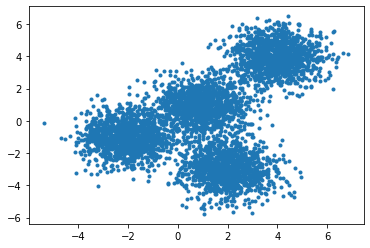

In [27]:
# display the scatter plot of the randomly generated data
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Model

## Set up K-Means

>Initialize KMeans with these parameters:
- init: Initialization method of the centroids.
 - Value will be: "k-means++"
 - k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
- n\_clusters: The number of clusters to form as well as the number of centroids to generate.
 - Value will be: 4 (since we have 4 centers)
- n\_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia.
 - Value will be: 12

>the output parameter is called k_means. 


In [28]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
# labels for each point 
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [31]:
# coordinates of the cluster centers 
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Visualize

In [32]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

<Figure size 432x288 with 0 Axes>

In [33]:
# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

In [34]:
# Create a plot
ax = fig.add_subplot(1, 1, 1)

In [35]:
# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

In [36]:
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

## Customer Segmentation with K-Means

> apply customer segmentation on historical customer dataset. 

>Customer segmentation
- Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. 
- It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources.

## Download Data

In [21]:
!wget -O ../data/Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2019-09-18 13:41:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘../data/Cust_Segmentation.csv’

../data/Cust_Segmen 100%[===================>]  33.47K   176KB/s    in 0.2s    

2019-09-18 13:41:58 (176 KB/s) - ‘../data/Cust_Segmentation.csv’ saved [34276/34276]



## Load Data

In [37]:
df = pd.read_csv('../data/Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Pre-process

>Address in this dataset is a categorical variable. 
- k-means algorithm isn't directly applicable to categorical variables

In [ ]:
# drop Address feature

In [38]:
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Normalize Data

>interpret features with different magnitudes and distributions equally. 

In [39]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Model

In [40]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

## Insights

In [41]:
#assign the labels to each row 
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [42]:
# check the centroid values by averaging the features in each cluster.
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


## Visualize

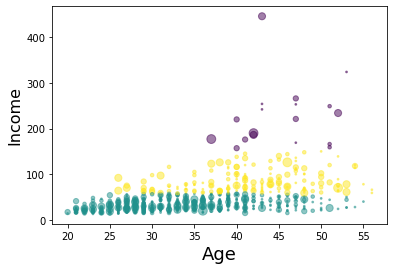

In [43]:
#look at the distribution of customers based on their age and income:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


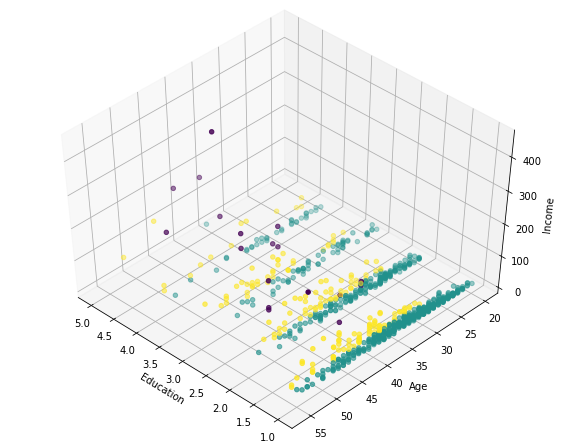

In [44]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


>k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. 

>The customers in each cluster are similar to each other demographically. 

> we can create a profile for each group, considering the common characteristics of each cluster. 

>The 3 clusters can be:
- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

# Hierarchical Clustering

<p align="center"> 
<img src="../images/04_Clustering/hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/divisive_hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_example_before.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_example_first.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_example_completed.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/dendrogram.png", width=800, height=600>
</p>

# Density-Based Clustering